****PART- A****

In [149]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [258]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

In [259]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split

**DOMAIN: Medical**

**CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.**

**• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.**

**• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.**

**• STEPS AND TASK [30 Marks]:**

**1. Data Understanding: [5 Marks]**

**A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]**

In [152]:
df = pd.read_csv('Normal.csv')
df1 = pd.read_csv('Type_H.csv')
df2 = pd.read_csv('Type_S.csv')

*Checking First and Last 5 Rows of Each Data set*

*Data set 1*

In [153]:
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [154]:
df.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
99,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


*Data set2*

In [155]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [156]:
df1.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Type_H
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H
59,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,Type_H


*Data set 3*

In [157]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [158]:
df2.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
149,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


**B. Print Shape and columns of all the 3 DataFrames. [1 Mark]**

*Shape of all the 3 Data set*

*Data set 1*

In [159]:
df.shape

(100, 7)

**First Data set 'Normal.csv' has 100 rows and 7 columns**

*Data set 2*

In [160]:
df1.shape

(60, 7)

**Second Data set 'Type_H.csv' has 60 rows and 7 columns**

*Data set 3*

In [161]:
df2.shape

(150, 7)

**Third Data set 'Type_S.csv' has 150 rows and 7 columns**

**C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]**

In [162]:
def compare(df, df1):
    orig = set(df.columns)
    
    c = set(df1.columns)

    #testing if length of set is same like length of columns names
    if len(c) != len(df1.columns):
        return ('Extra columns in the dataframe.')
    #if same sets
    elif (c == orig):
        return ('Identical columns in all the Data set.')
    #compared subsets
    elif c.issubset(orig):
        return ('Missing columns in dataframe.')
    #compared subsets
    elif orig.issubset(c):
        return ('Extra columns in dataframe.')
    else:
        return ('Column names are incorrect.')
print(compare(df, df1))                    
print(compare(df, df2)) 

Identical columns in all the Data set.
Identical columns in all the Data set.


**D. Print DataTypes of all the 3 DataFrames. [1 Mark]**

**Data set 1**

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [164]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**Data set 2**

In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [166]:
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**Data set 3**

In [167]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [168]:
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

*From the above output we can see that there are no junk values in any of the data sets.*

**E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]**

*From the above analysis we see that the 'Class' feature is object and we need to change the data type of this particular column in order to further analyse the data sets.*

**2. Data Preparation and Exploration: [5 Marks]**

**A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]**

**For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’**

**Data set1**

In [169]:
df['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [170]:
df.loc[df['Class']=='Nrmal','Class']='Normal'

In [171]:
df['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

**Data set 2**

In [172]:
df1['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [173]:
df1.loc[df1['Class']=='type_h','Class']='Type_H'

In [174]:
df1['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

**Data set 3**

In [175]:
df2['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

In [176]:
df2.loc[df2['Class']=='tp_s','Class']='Type_S'

In [177]:
df2['Class'].value_counts()

Type_S    150
Name: Class, dtype: int64

**B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]**

**Checkpoint: Expected Output shape = (310,7)**

In [236]:
df_main=df.append([df1,df2])

In [237]:
df_main.shape

(310, 7)

*The final data frame, that is, 'df_main' has 310 rows and 7 columns*

**C. Print 5 random samples of this DataFrame [1 Marks]**

In [238]:
df_main.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [239]:
df_main.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
82,34.756738,2.631740,29.504381,32.124998,127.139849,-0.460894,Normal
30,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538,Normal
15,59.726140,7.724873,55.343485,52.001268,125.174221,3.235159,Normal
32,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603,Type_S
69,77.236898,16.737622,49.775534,60.499275,110.690377,39.787154,Type_S


**D. Print Feature-wise percentage of Null values. [1 Mark]**

In [240]:
#Checking the Null values first and then if neccessary we will calculate the percentage 
df_main.isnull().sum()

#percent= df_main.isnull().sum() * 100 / len(df_main))
#print(round(percent,2))

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

*We see that there are no missing values in the Dataframe*

**E. Check 5-point summary of the new DataFrame. [1 Mark]**

**5-point summary of the new DataFrame**

*Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.

*1st Quartile: The 25th percentile.*

*3rd Quartile: The 75th percentile.*

*Minimum: The smallest observation in the sample.*

*Maximum: The largest observation in the sample.*

In [241]:
df_main.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**3. Data Analysis: [10 Marks]**

**A. Visualize a heatmap to understand correlation between all features [2 Marks]**

<AxesSubplot:>

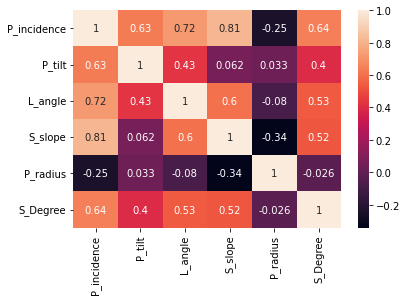

In [242]:
sns.heatmap(df_main.corr(),annot=True)

**B. Share insights on correlation. [2 Marks]**

*A. Features having stronger correlation with correlation value.*

**S_degree and P_incidence have stronger correlation which is .64.**

*B. Features having weaker correlation with correlation value.*

**S_degree and P_radius have negative correlation (-0.026), and hence, have a weaker corellation.**

**C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]**

In [243]:
df_main.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [244]:
import seaborn as sns
%matplotlib inline

In [245]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [246]:
df_main.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [247]:
df_main['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [252]:
df_main['Class'] = df_main['Class'].astype('category')

In [253]:
df_main['Class'].nunique()

3

In [254]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.4 KB


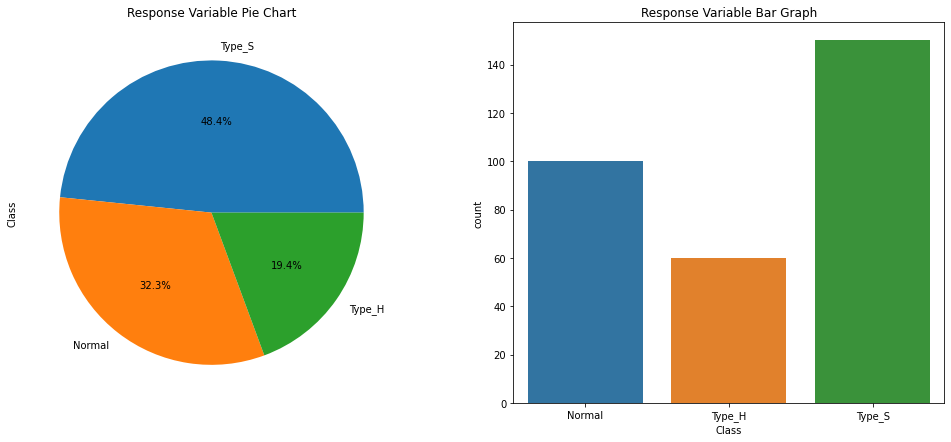

In [255]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df_main['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df_main,ax=axes[1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

In [313]:
#sns.pairplot(df_main, hue= 'Class')
#sns.pairplot(data=df_main[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']], hue = "Class")
#not working for some reason

**D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]**

In [142]:
df_main.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [200]:
df_main[['P_incidence', 'S_slope']]

,P_incidence,S_slope
0,38.505273,21.540976
1,54.920858,35.952428
2,44.362490,35.417055
3,48.318931,30.866809
4,45.701789,35.041929
...,...,...
145,80.111572,46.169139
146,95.480229,48.930176
147,74.094731,55.271004
148,87.679087,67.313473


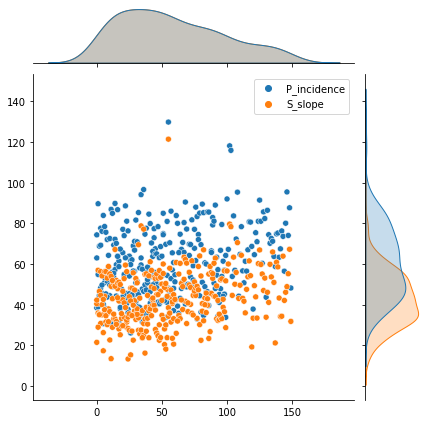

In [202]:
sns.jointplot(data=df_main[['P_incidence', 'S_slope']],);

*We see that P_incidence value is higher than the S_slope. we also see that the S_slope is left-skew while the P_incidence is not that much.*

**E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]**

<AxesSubplot:>

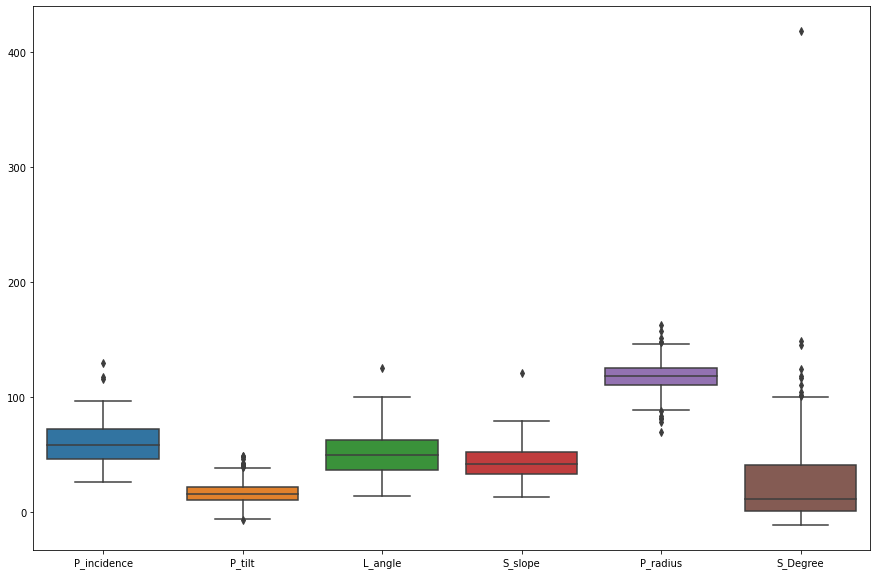

In [209]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_main)

**P_incidence:**

*Mean and Median are nearly equal . Few outliers are there on the upper end.

Distribution might be normal. we have 75 % of values are less than 72 but maxiumum value is 129.*


**P_tilt:**

*Mean and median are nearly equal.

Distribution might be normal. Outlier are present on both the ends.

It contains negative values.

75 % of values are less than 22 but maximum value is 49 so there might be little right skewness.*


**L_angle:**

*Mean and Median are nearly equal. There is no deviation.

Distribution might be normal. Few outliers on the upper end.

There might be few outliers because of the maximum value.*


**S_slope:**

*Mean and Median are nearly equal. Few outliers on the upper end.

Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.*


**P_radius:**

*Distribution might be normal. Outliers on both the ends.

There is no much Deviation.*


**S_Degree:**

*Mean is greater than Median so there might be right skewness in the data . Few outliers on the upper end.

We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.*

**4. Model Building: [6 Marks]**

**A. Split data into X and Y. [1 Marks]**

In [211]:
X=df_main.drop(columns='Class')
y=df_main['Class']

In [212]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [213]:
X_Scaled=X.apply(zscore)

In [214]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


*We have scaled independent variables to corresponding z-score.*

*We can see Mean becomes close to zero and Standard Deviation becomes 1*

**B. Split data into train and test with 80:20 proportion. [1 Marks]**

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]**

In [218]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )

In [219]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

**D. Print all the possible performance metrics for both train and test data. [2 Marks]**

In [220]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8911290322580645
Accuracy on Test data: 0.8387096774193549


**5. Performance Improvement: [4 Marks]**

**A. Experiment with various parameters to improve performance of the base model. [2 Marks]**

*(Optional: Experiment with various Hyperparameters - Research required)*

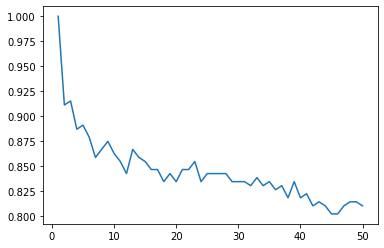

In [221]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
plt.plot(range(1,51),train_score)
plt.show()

*We see that training accuracy decreases as k value increases.*

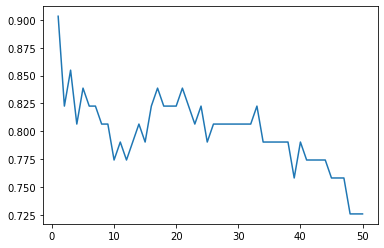

In [222]:
plt.plot(range(1,51),test_score)
plt.show()

*It is evident from above figure that maximum accuracy is for K<20. So we will chooe k value less than 20 and check the model.*

**B. Clearly showcase improvement in performance achieved. [1 Marks]**

*For Example:*

*A. Accuracy: +15% improvement*

*B. Precision: +10% improvement.*

In [228]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.9032258064516129:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.81      0.94      0.87        18
      Type_H       0.89      0.73      0.80        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62

Accuracy on Training data for k 3 is 0.9153225806451613:
Accuracy on Test data for k 3 is 0.8548387096774194:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85     

*For K=13 we have balanced train and test error*

**C. Clearly state which parameters contributed most to improve model performance. [1 Marks]**

*When the scaled values are used instead of normal values Logistic regression is performing well.*

***PART-B***

**DOMAIN: Banking, Marketing**

**CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.**

**DATA DICTIONARY:**

*1. Team: Team’s name*

*2. ID: Customer ID*

*3. Age: Customer’s approximate age.*

*4. CustomerSince: Customer of the bank since. [unit is masked]*

*5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]*

*6. ZipCode: Customer’s zip code.*

*7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.*

*8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]*

*9. Level: A level associated to the customer which is masked by the bank as an IP.*

*10. Mortgage: Customer’s mortgage. [unit is masked]*

*11. Security: Customer’s security asset with the bank. [unit is masked]*

*12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]*

*13. InternetBanking: if the customer uses internet banking.*

*14. CreditCard: if the customer uses bank’s credit card.*

*15. LoanOnCard: if the customer has a loan on credit card.*

**PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.**

**STEPS AND TASK [30 Marks]:**

**1. Data Understanding and Preparation: [5 Marks]**

**A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]**

*Reading the Data set 1 and 2*

In [260]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

*Checking First 5 rows*

*Data1*

In [261]:
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


*Data2*

In [262]:
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


**B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]**

*Data1*

In [263]:
df1.shape

(5000, 8)

*Data set 1 has 5000 rows and 8 columns*

In [264]:
df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [275]:
df1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

*Data2*

In [267]:
df2.shape

(5000, 7)

*Data set 2 has 5000 rows and 7 columns*

In [268]:
df2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [269]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [276]:
df2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]**

In [295]:
##Since ID is common in both the datasets we will add the data column wise.
df=df1.merge(df2,left_on='ID',right_on='ID')

In [296]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [297]:
df.shape

(5000, 14)

*Now the new dataframe has 5000 rows and 14 columns*

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [299]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**D. Change Datatype of below features to ‘Object’ [1 Marks]**

*‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.*

*[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]*

In [300]:
##Changing datatypes of categorical feature
categorical_change=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard']
for i in categorical_change:
    df[i]=df[i].astype('object')

In [301]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

**2. Data Exploration and Analysis: [5 Marks]**

**A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]**

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


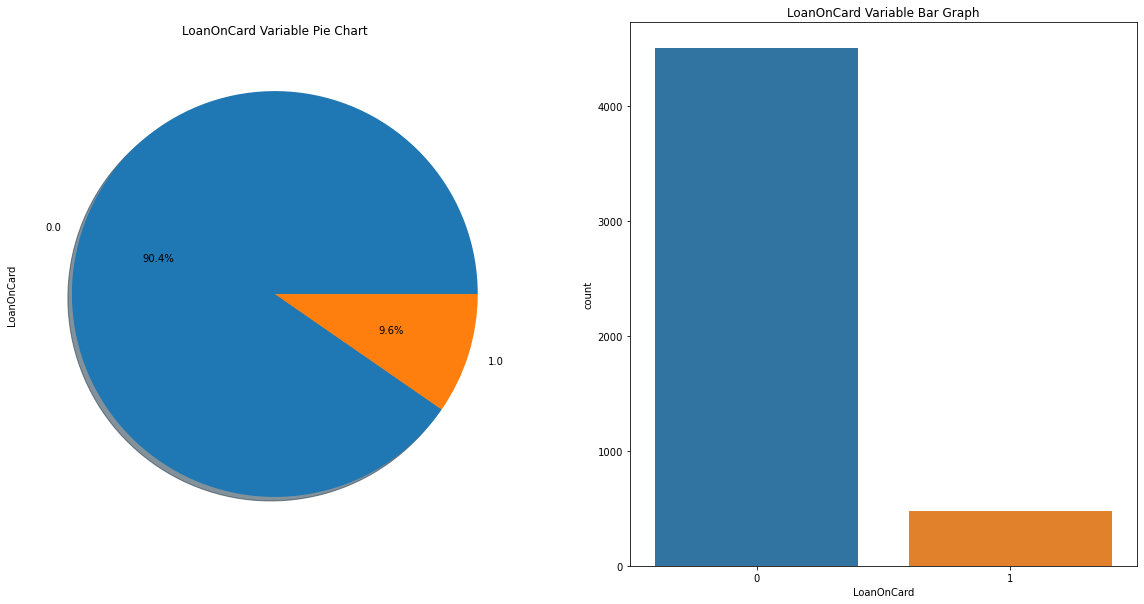

In [303]:
f,axes=plt.subplots(1,2,figsize=(20,10))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

*From the above graph and plot we see that approx ~90% of people do not have loan on the Credit Card*

**B. Check the percentage of missing values and impute if required. [1 Marks]**

In [304]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [308]:
percent= df.isnull().sum()*100/len(df)
print(round(percent,2))

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


*Since the missing valeus are very less when compared to the whole dataset, we can conviniently drop those missing values*

In [309]:
df.dropna(axis=0,inplace=True)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   object 
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   object 
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   object 
 10  FixedDepositAccount  4980 non-null   object 
 11  InternetBanking      4980 non-null   object 
 12  CreditCard           4980 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 583.6+ KB


**C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]**

*[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]*

In [314]:
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759,0.096386
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758,0.295149
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000,1.000000


*Droping ID column before we start with further analysis.*

In [315]:
df.drop('ID',axis=1,inplace=True)

In [316]:
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759,0.096386
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758,0.295149
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000,0.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000,1.000000


**3. Data Preparation and model building: [10 Marks]**

**A. Split data into X and Y. [1 Marks]**

*[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]*

In [318]:
df.drop(['ZipCode'],axis=1,inplace=True)

In [319]:
df.describe()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,1.939536,56.589759,0.096386
std,11.464212,11.468716,46.07009,1.750006,101.836758,0.295149
min,23.000000,-3.000000,8.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,0.700000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,1.500000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,2.525000,101.000000,0.000000
max,67.000000,43.000000,224.00000,10.000000,635.000000,1.000000


*plitting the Data*

In [324]:
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard']

In [321]:
X.describe()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,1.939536,56.589759
std,11.464212,11.468716,46.07009,1.750006,101.836758
min,23.000000,-3.000000,8.00000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,2.525000,101.000000
max,67.000000,43.000000,224.00000,10.000000,635.000000


In [323]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


**B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]**

In [325]:
# Split X and Y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]**

**D. Print evaluation metrics for the model and clearly share insights. [1 Marks]**

In [326]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train))
print('Accuracy on Test data:',logit.score(X_test, y_test))

Accuracy on Training data: 0.9493975903614458
Accuracy on Test data: 0.9437751004016064


*We got 94% accuracy on training set and 93% accuracy on test set.*

*Training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good.*

**E. Balance the data using the right balancing technique. [2 Marks]**

*i. Check distribution of the target variable*

*ii. Say output is class A : 20% and class B : 80%*

*iii. Here you need to balance the target variable as 50:50.*

*iv. Try appropriate method to achieve the same.*

**F. Again train the same previous model on balanced data. [1 Marks]**

**G. Print evaluation metrics and clearly share differences observed. [2 Marks]**

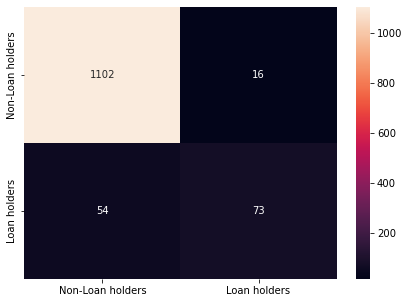

In [332]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [333]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.82      0.57      0.68       127

    accuracy                           0.94      1245
   macro avg       0.89      0.78      0.82      1245
weighted avg       0.94      0.94      0.94      1245



**4. Performance Improvement: [10 Marks]**

**A. Train a base model each for SVM, KNN. [4 Marks]**

In [328]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=10)
SVM_model=SVC()

LR: 0.948193 (0.007921)
KNN: 0.911847 (0.011051)
SVC: 0.907831 (0.011929)


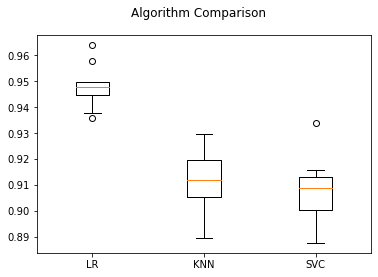

In [329]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVC', SVM_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

*We see that the accuracy for all the models are good enough with LR model having highest of all the three.*

**B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]**

*(Optional: Experiment with various Hyperparameters - Research required)*

*Lets us try with startified k-fold to check if performance increrases or not*

In [330]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=10)
SVM_model=SVC()

LR: 0.949398 (0.008122)
KNN: 0.911847 (0.008588)
SVC: 0.908835 (0.003935)


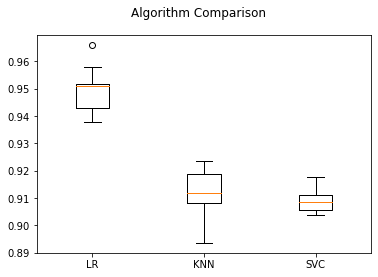

In [331]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

*We can see slight improvment in the accuracy of the model*

**C. Print evaluation metrics for final model. [1 Marks]**

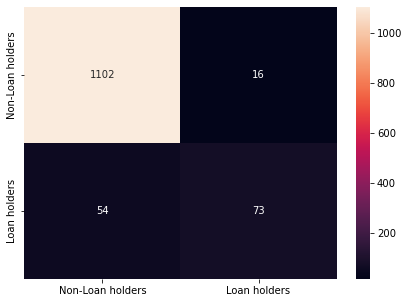

In [334]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

**D. Share improvement achieved from base model to final model. [2 Marks]**

*We are selecting final model as logistic regression as it performs well in training and testing test.*

*Logistic Regression is not affected by overfitting and it is also has good recall value.*

*Logistic regression performed well in k-fold cross validation as well.*

*Deviation was also minimum for logistic regression.*


*Few customers do not have credit card but those customer having loan on card. This data error can be avoided.*